#### Setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

In [3]:
df1 = pd.read_csv("Dataset1_TranscriptMahasiswa.csv", sep=";", dtype={"NIM" :"object", "NAMA_MK" : "string"})
df2 = pd.read_csv("Dataset2_EvaluasiDosenPerMK.csv", sep=";", decimal=",")

In [4]:
df1["NIM"].nunique()

770

#### Data Cleansing

Dataframe 1 (Transkrip Mahasiswa)

In [5]:
df1['KODE_MK'][df1['NAMA_MK'].isnull()].unique()

array(['SI863'], dtype=object)

In [6]:
df1["NAMA_MK"] = df1["NAMA_MK"].fillna("Tugas Akhir") # Kebetulan yang null cuman SI863

for i in df1.index:  
    if df1.at[i, "KODE_MK"] not in df1.at[i, "NAMA_MK"].split(" ") : 
        df1.at[i, "NAMA_MK"] = df1.at[i, "KODE_MK"] + " " + df1.at[i, "NAMA_MK"]

In [7]:
indeks = ["A", "A-", "B+", "B", "B-", "C+", "C", "D", "E", "F"]
bobot = [4, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.0, 0, 0]
ranges = [[100, 85], [84.99, 80], [79.99, 75], [74.99, 70], [69.99, 65], [64.99, 60], [59.99, 55], [54.99, 45], [44.99,0]]

for i in df1.index: 
    for j in ranges: 
        if j[1] <= df1.at[i, "NILAI"] <= j[0]:
            df1.at[i, "GRADE"] = indeks[ranges.index(j)]

for i in df1.index:
    for j in indeks:
        if df1.at[i, "GRADE"] == j:
            df1.at[i, "BOBOT"] = bobot[indeks.index(j)]
            df1.at[i, "TOTAL_BOBOT"] = df1.at[i, "BOBOT"] * df1.at[i, "SKS"]

In [8]:
df1.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT,TOTAL_BOBOT
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C,2.0,6.0
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B,3.0,9.0
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C,2.0,8.0
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C,2.0,6.0
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B,3.0,9.0


In [9]:
df1[df1['GRADE'].isnull()]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT,TOTAL_BOBOT


In [10]:
df1["NILAI"] = df1["NILAI"].fillna(0)
df1[df1['NILAI'].isnull()]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE,BOBOT,TOTAL_BOBOT


Dataframe 2 (Evaluasi Dosen per Mata Kuliah)

In [11]:
df2.head(14)

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI
0,2015,1511,IS100 Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,3.28
1,2015,1511,IS100 Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,3.25
2,2015,1511,IS100 Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,3.24
3,2015,1511,IS100 Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,3.30
4,2015,1511,IS100 Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,3.27
5,2015,1511,IS100 Management Information Systems,6,Pemakaian buku teks sebagai buku utama perkuli...,3.19
6,2015,1511,IS100 Management Information Systems,7,Memberi review materi perkuliahan sebelumnya,3.18
7,2015,1511,IS100 Management Information Systems,8,"Pemberian kesempatan bertanya, berdiskusi sert...",3.32
8,2015,1511,IS100 Management Information Systems,9,Kejelasan menjawab pertanyaan /diskusi di kelas,3.29
9,2015,1511,IS100 Management Information Systems,10,Pemberian tugas/kuis serta pembahasannya di kelas,3.24


In [28]:
df4 = pd.DataFrame(df2.groupby(["TAHUN", "MATAKULIAH"])["NILAI"].mean().reset_index())
df4.rename(columns = {"NILAI" : "NILAI_RATA-RATA"}, inplace = True)

df4

,TAHUN,MATAKULIAH,NILAI_RATA-RATA
0,2015,IS100 Management Information Systems,3.265000
1,2015,IS110 Business Mathematics,3.087143
2,2015,IS201 Corporate Business Processes,3.064286
3,2015,IS220 Human and Computer Interaction,3.295000
4,2015,IS230 Algorithms and Programming,3.129286
...,...,...,...
134,2018,IS726 Innovation in Information and Technology,3.363571
135,2018,IS747 Database Administration 2,3.740000
136,2018,IS749 Business Intelligence,3.361429
137,2018,IS773 IT Governance 3,3.240714


Data Exploration

Text(0, 0.5, 'Jumlah')

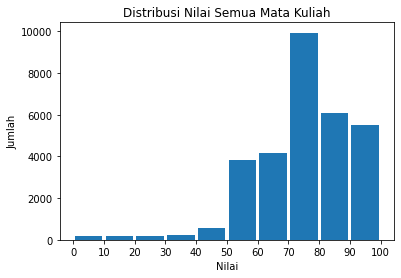

In [12]:
plt.title("Distribusi Nilai Semua Mata Kuliah")
plt.hist(df1["NILAI"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], rwidth=0.9)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel("Nilai")
plt.ylabel("Jumlah")

In [26]:
# Pembuataan Dataframe dengan grouping data berdasarkan NIM
# Perhitungan SKS
df3_ = pd.DataFrame(df1.groupby(["NIM"])["SKS"].sum().reset_index())
# Perhitungan Grade
df3__ = pd.DataFrame(df1.loc[(df1["GRADE"] == "D") | (df1["GRADE"] == "E") | (df1["GRADE"] == "F")].groupby("NIM")["GRADE"].sum().reset_index())
# Perhitungan Total Bobot
df3___ = pd.DataFrame((df1.groupby("NIM")["TOTAL_BOBOT"].sum().reset_index()))

# Merging Dataframe
df3 = pd.merge(df3_, df3__, how="left", on=["NIM"])
df3 = pd.merge(df3, df3___, how="left", on=["NIM"])
df3["GRADE"] = df3["GRADE"].fillna("")

# Perhitungan IPK
for i in df3.index:
    df3.at[i ,"IPK"] = df3.at[i, "TOTAL_BOBOT"] / df3.at[i, "SKS"]

df3.rename(columns = {"GRADE" : "FAILED_GRADE", "SKS" : "TOTAL SKS"}, inplace = True)
df3.head()

,NIM,TOTAL SKS,FAILED_GRADE,TOTAL_BOBOT,IPK
0,00000008429,145,D,474.5,3.272414
1,00000008455,136,DD,416.2,3.060294
2,00000008481,127,DDDEEED,313.6,2.469291
3,00000008631,145,,519.3,3.581379
4,00000008684,145,,512.1,3.531724


In [14]:
# Belum Nambah Faktor yang ngulang terus nilainya udah lulus 
for i in df3.index:
    if df3.at[i, "SKS"] >= 144 and df3.at[i, "GRADE"] == "" and df3.at[i, "IPK"] >= 2.5:
        df3.at[i, "TIDAK_LULUS"] = False
    else:  
        df3.at[i, "TIDAK_LULUS"] = True

In [15]:
df3["TIDAK_LULUS"].value_counts()

True     589
False    181
Name: TIDAK_LULUS, dtype: int64

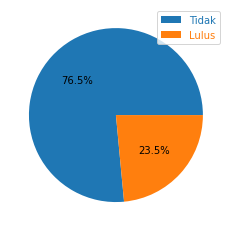

In [16]:
plt.pie(df3["TIDAK_LULUS"].value_counts(), autopct='%1.1f%%')
plt.legend(["Tidak", "Lulus"], labelcolor="linecolor")